# Keras Tutorial

Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. 

The core data structures of Keras are layers and models. The simplest type of model is the Sequential model, a linear stack of layers. In this tutorial we will be creating a Convolutional Neural Network (CNN) using Keras to identify which number (from 0 to 9) is depicted by an image in the MNIST dataset.

## CNN
A **Convolutional Neural Network** (CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a CNN is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, CNNs have the ability to learn these filters/characteristics.

Computers see images using pixels. Pixels in images are usually related. A convolution multiplies a matrix of pixels with a filter matrix or ‘kernel’ and sums up the multiplication values. Then the convolution slides over to the next pixel and repeats the same process until all the image pixels have been covered. The objective of the convolution operation is to extract the high-level features such as edges, from the input image. 

In [2]:
# Done so that the output of plotting commands is displayed inline, directly below the code cell that produced it.
%matplotlib inline

In [3]:
# Importing all the required modules
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np

## Data Setup

### Importing the data

The MNIST dataset is conveniently provided to us as part of the Keras library, so we can easily load the dataset. Out of the 70,000 images provided in the dataset, 60,000 are given for training and 10,000 are given for testing.

When we load the dataset below, X_train and X_test will contain the images, and y_train and y_test will contain the digits that those images represent.

In [4]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


We will plot the first image in our dataset and check its size using the ‘shape’ function. This gives us an idea of what the data looks like.

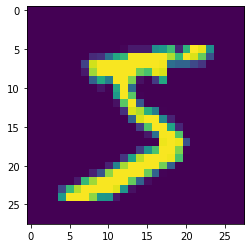

In [5]:
#plot the first image in the dataset
plt.imshow(X_train[0])

In [6]:
#check image shape
X_train[0].shape

(28, 28)

By default, the shape of every image in the mnist dataset is 28 x 28, so we will not need to check the shape of all the images.

### Data Pre-processing

Next, we need to reshape our dataset inputs (X_train and X_test) to the shape that our model expects when we train the model. The first number is the number of images (60,000 for X_train and 10,000 for X_test). Then comes the shape of each image (28x28). The last number is 1, which signifies that the images are greyscale.

In [7]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

We need to ‘one-hot-encode’ our target variable. This means that a column will be created for each output category and a binary variable is inputted for each category. 

In [8]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

The above output tells us that the number depicted is 5 as the sixth  index of the array is 1 and the rest are 0.

## CNN with Keras

Keras has multiple options to create models. The model type that we will be using is Sequential. It allows you to build a model layer by layer. We use the `add()` function to add layers to our model.

The layers in our model as designed above are as follows -
1. **Conv2D layers**: Our first 2 layers are Conv2D layers. These are convolution layers that will deal with our input images, which are seen as 2-dimensional matrices. 64 in the first layer and 32 in the second layer are the number of nodes in each layer. This number can be adjusted to be higher or lower, depending on the size of the dataset.
2. **Flatten layer**: It serves as a connection between the convolution and dense layers.
3. **Dense layer**: It is the layer type we use for our output layer. Dense is a standard layer type that is used in many cases for neural networks. We will have 10 nodes in our output layer, one for each possible outcome (0–9).

The following is the code for building the model using Keras -

In [9]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))



* **Kernel size**: It is the size of the filter matrix for our convolution. So a kernel size of 3 means we will have a 3x3 filter matrix.
* **Activation**: It is the activation function for the layer.
    * **ReLU**: The rectified linear activation function (ReLU) for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. `relu` is the activation function for the first two layers.
    * **Softmax**: The activation for the Dense layer is `softmax`. It makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.

* **Shape**: It is the shape of each input image i.e. 28,28,1 as seen earlier on, with the 1 signifying that the images are greyscale.


### Compiling the model

Next, we need to compile our model. Compiling the model takes three parameters: **optimizer**, **loss** and **metrics**.
* The optimizer controls the learning rate. We will be using `adam` as our optmizer. Adam is generally a good optimizer to use for many cases. The adam optimizer adjusts the learning rate throughout training.
* The learning rate determines how fast the optimal weights for the model are calculated. A smaller learning rate may lead to more accurate weights (up to a certain point), but the time it takes to compute the weights will be longer.
* We will use `categorical_crossentropy` for our loss function. This is the most common choice for classification. A lower score indicates that the model is performing better.
* To make things even easier to interpret, we will use the `accuracy` metric to see the accuracy score on the validation set when we train the model.

In [10]:
#compile model using accuracy as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________
None


### Training the Model

Now we will train our model. To train, we will use the `fit()` function on our model with the following parameters: training data (train_X), target data (train_y), validation data, and the number of epochs. For our validation data, we will use the test set provided to us in our dataset, which we have split into X_test and y_test.

The number of epochs is the number of times the model will cycle through the data. For our model, we will set the number of epochs to 3.

In [11]:
#train model
model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 175s 93ms/step - loss: 0.2021 - accuracy: 0.9526 - val_loss: 0.0822 - val_accuracy: 0.9756
Epoch 2/3
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0632 - accuracy: 0.9803 - val_loss: 0.0666 - val_accuracy: 0.9783
Epoch 3/3
1875/1875 [==============================] - 170s 91ms/step - loss: 0.0472 - accuracy: 0.9854 - val_loss: 0.0783 - val_accuracy: 0.9770


## Testing

If you want to see the actual predictions that our model has made for the test data, we can use the predict function. The predict function will give an array with 10 numbers. These numbers are the probabilities that the input image represents each digit (0–9). The array index with the highest number represents the model prediction. The sum of each array equals 1 (since each number is a probability).

To show this, we will show the predictions for the first 4 images in the test set.

In [12]:
#show predictions for the first 3 images in the test set
np.around(model.predict(X_test[:4]), decimals = 4)

array([[0.000e+00, 0.000e+00, 2.000e-04, 1.000e-04, 0.000e+00, 0.000e+00,
        0.000e+00, 9.997e-01, 0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e-04, 9.186e-01, 1.000e-04, 0.000e+00, 4.700e-03, 3.000e-04,
        5.000e-04, 0.000e+00, 7.570e-02, 0.000e+00],
       [9.997e-01, 0.000e+00, 3.000e-04, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]], dtype=float32)

Let’s compare this with the actual values -

In [13]:
#show actual results for the first 3 images in the test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

We can convert the above arrays into a more readable format using the code below -

In [14]:
j = 4
for i in y_test[:j]:
  result = np.where(i == 1)
  print("The image at index number {} has the number".format(4 - j), result[0], sep = ' ')
  j = j-1

The image at index number 0 has the number [7]
The image at index number 1 has the number [2]
The image at index number 2 has the number [1]
The image at index number 3 has the number [0]


The actual values show that the first four images are 7, 2, 1 and 0. This matches up with our model's predictions. Thus we are able to realize a CNN using Keras.

# References

1. [Blog Post: Building a Convolutional Neural Network (CNN) in Keras by Eijaz Allibhai](https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5)
2. [Keras Offical Documentation](https://keras.io/about/)